In [1]:
from covid_lib import read_covid_data
import numpy as np
import matplotlib.pyplot as plt

from aidam.math_utils import lag_correlation_ext
from scipy.stats import pearsonr
from aidam.aicharts import plotyy

## Lettura e preprocessing dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 314
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-01-02T17:00:00


## Calcolo LAG correlation

In [6]:
max_delay=60
delays=list(range(0,max_delay))

x_name_list=['perc_tamponi_positivi']
y_name='deceduti_giornalieri'


y=trend[y_name]['Italia']


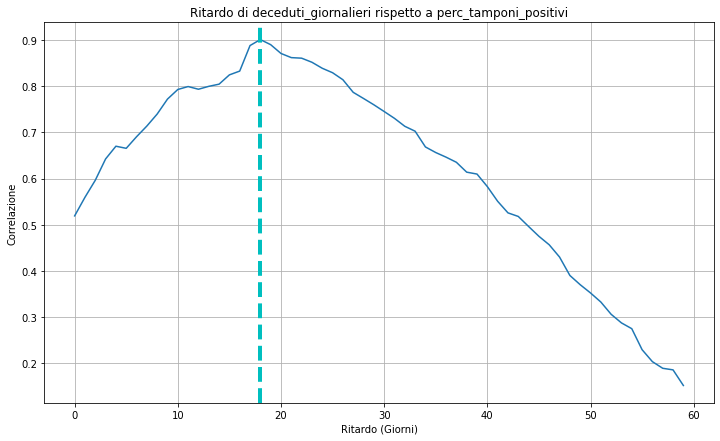

In [7]:
for x_name in x_name_list:
    x=trend[x_name]['Italia']
    if x_name=='perc_tamponi_positivi':
        x[0]=x[1]
    corrs,betas=lag_correlation_ext(x,y,delays,corr_fun=pearsonr)
    max_point=np.argmax(corrs)
    
    fig,ax=plt.subplots(1,figsize=(12,7))
    ax.plot(delays,corrs,label='Correlazione')
    ax.grid()
    ax.set_xlabel('Ritardo (Giorni)')
    ax.set_ylabel('Correlazione')
    ax.set_title('Ritardo di %s rispetto a %s'%(y_name,x_name))
    ax.axvline(x=max_point,c='c', linewidth=4,ls='--')

In [5]:
y

array([  221.,    93.,    78.,   250.,   238.,   240.,   566.,   342.,
         466.,   587.,   769.,   778.,  1247.,  1492.,  1797.,   977.,
        2313.,  2651.,  2547.,  3497.,  3590.,  3233.,  3526.,  4207.,
        5322.,  5986.,  6557.,  5560.,  4789.,  5249.,  5210.,  6153.,
        5959.,  5974.,  5217.,  4050.,  4053.,  4782.,  4668.,  4585.,
        4805.,  4316.,  3599.,  3039.,  3836.,  4204.,  3951.,  4694.,
        4092.,  3153.,  2972.,  2667.,  3786.,  3493.,  3491.,  3047.,
        2256.,  2729.,  3370.,  2646.,  3021.,  2357.,  2324.,  1739.,
        2091.,  2086.,  1872.,  1965.,  1900.,  1389.,  1221.,  1075.,
        1444.,  1401.,  1327.,  1083.,   802.,   744.,  1402.,   888.,
         992.,   789.,   875.,   675.,   451.,   813.,   665.,   642.,
         652.,   669.,   531.,   300.,   397.,   584.,   593.,   516.,
         416.,   355.,   178.,   318.,   321.,   177.,   518.,   270.,
         197.,   280.,   283.,   202.,   379.,   163.,   346.,   338.,
      